# Financial Anomaly Data

https://www.kaggle.com/datasets/devondev/financial-anomaly-data

# Importing libraries and data

In [428]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [429]:
# plt.interactive(False)

In [430]:
# df = pd.read_csv('./Data/financial_anomaly_data.csv')
df = pd.read_csv('./Data/df_restricted_countries.csv', index_col=0)

df

,Timestamp,TransactionID,AccountID,Amount,Merchant,TransactionType,Location
0,01-01-2023 08:00,TXN1127,ACC4,95071.92,MerchantH,Purchase,Tokyo
1,01-01-2023 08:01,TXN1639,ACC10,15607.89,MerchantH,Purchase,London
2,01-01-2023 08:02,TXN872,ACC8,65092.34,MerchantE,Withdrawal,London
3,01-01-2023 08:03,TXN1438,ACC6,87.87,MerchantE,Purchase,London
4,01-01-2023 08:04,TXN1338,ACC6,716.56,MerchantI,Purchase,Los Angeles
...,...,...,...,...,...,...,...
216955,31-05-2023 23:55,TXN1286,ACC6,62536.88,MerchantA,Withdrawal,San Francisco
216956,31-05-2023 23:56,TXN1015,ACC5,68629.69,MerchantG,Transfer,London
216957,31-05-2023 23:57,TXN1979,ACC15,8203.57,MerchantF,Purchase,London
216958,31-05-2023 23:58,TXN1845,ACC14,77800.36,MerchantF,Purchase,New York


# Dealing with null values

In [431]:
# rows with all null values (all columns are null)
# axis=1 refers to columns (vertically) in the DataFrame
df[df.isnull().all(axis=1)]

# rows with any null value (at least one column is null)
df[df.isnull().any(axis=1)]

,Timestamp,TransactionID,AccountID,Amount,Merchant,TransactionType,Location


,Timestamp,TransactionID,AccountID,Amount,Merchant,TransactionType,Location


In [432]:
# Create a copy of the DataFrame to avoid modifying the original
df_cleaned = df.dropna()

# original DataFrame (unchanged)
df

# DataFrame with rows containing null values removed
df_cleaned

,Timestamp,TransactionID,AccountID,Amount,Merchant,TransactionType,Location
0,01-01-2023 08:00,TXN1127,ACC4,95071.92,MerchantH,Purchase,Tokyo
1,01-01-2023 08:01,TXN1639,ACC10,15607.89,MerchantH,Purchase,London
2,01-01-2023 08:02,TXN872,ACC8,65092.34,MerchantE,Withdrawal,London
3,01-01-2023 08:03,TXN1438,ACC6,87.87,MerchantE,Purchase,London
4,01-01-2023 08:04,TXN1338,ACC6,716.56,MerchantI,Purchase,Los Angeles
...,...,...,...,...,...,...,...
216955,31-05-2023 23:55,TXN1286,ACC6,62536.88,MerchantA,Withdrawal,San Francisco
216956,31-05-2023 23:56,TXN1015,ACC5,68629.69,MerchantG,Transfer,London
216957,31-05-2023 23:57,TXN1979,ACC15,8203.57,MerchantF,Purchase,London
216958,31-05-2023 23:58,TXN1845,ACC14,77800.36,MerchantF,Purchase,New York


,Timestamp,TransactionID,AccountID,Amount,Merchant,TransactionType,Location
0,01-01-2023 08:00,TXN1127,ACC4,95071.92,MerchantH,Purchase,Tokyo
1,01-01-2023 08:01,TXN1639,ACC10,15607.89,MerchantH,Purchase,London
2,01-01-2023 08:02,TXN872,ACC8,65092.34,MerchantE,Withdrawal,London
3,01-01-2023 08:03,TXN1438,ACC6,87.87,MerchantE,Purchase,London
4,01-01-2023 08:04,TXN1338,ACC6,716.56,MerchantI,Purchase,Los Angeles
...,...,...,...,...,...,...,...
216955,31-05-2023 23:55,TXN1286,ACC6,62536.88,MerchantA,Withdrawal,San Francisco
216956,31-05-2023 23:56,TXN1015,ACC5,68629.69,MerchantG,Transfer,London
216957,31-05-2023 23:57,TXN1979,ACC15,8203.57,MerchantF,Purchase,London
216958,31-05-2023 23:58,TXN1845,ACC14,77800.36,MerchantF,Purchase,New York


In [433]:
df_cleaned[df_cleaned.isnull().any(axis=1)]

,Timestamp,TransactionID,AccountID,Amount,Merchant,TransactionType,Location


In [434]:
df_original = df
df = df_cleaned

# Counting unique values

In [435]:
df_cleaned.nunique()

Timestamp          216960
TransactionID        1999
AccountID              15
Amount             214687
Merchant               10
TransactionType         3
Location                8
dtype: int64

In [436]:
np.sort(df_cleaned["TransactionID"].unique())

array(['TXN1', 'TXN10', 'TXN100', ..., 'TXN997', 'TXN998', 'TXN999'],
      dtype=object)

In [437]:
columns_to_include = [
    col for col in df_cleaned.columns if df_cleaned[col].nunique() < 20]

for column_name in columns_to_include:
  unique_values = np.sort(df_cleaned[column_name].unique())
  print(f"Unique values in column '{column_name}':")
  for value in unique_values:
    print(value)
  print()

Unique values in column 'AccountID':
ACC1
ACC10
ACC11
ACC12
ACC13
ACC14
ACC15
ACC2
ACC3
ACC4
ACC5
ACC6
ACC7
ACC8
ACC9

Unique values in column 'Merchant':
MerchantA
MerchantB
MerchantC
MerchantD
MerchantE
MerchantF
MerchantG
MerchantH
MerchantI
MerchantJ

Unique values in column 'TransactionType':
Purchase
Transfer
Withdrawal

Unique values in column 'Location':
Iran
Iraq
London
Los Angeles
New York
San Francisco
Sudan
Tokyo



# Describing the amount

In [438]:
df

,Timestamp,TransactionID,AccountID,Amount,Merchant,TransactionType,Location
0,01-01-2023 08:00,TXN1127,ACC4,95071.92,MerchantH,Purchase,Tokyo
1,01-01-2023 08:01,TXN1639,ACC10,15607.89,MerchantH,Purchase,London
2,01-01-2023 08:02,TXN872,ACC8,65092.34,MerchantE,Withdrawal,London
3,01-01-2023 08:03,TXN1438,ACC6,87.87,MerchantE,Purchase,London
4,01-01-2023 08:04,TXN1338,ACC6,716.56,MerchantI,Purchase,Los Angeles
...,...,...,...,...,...,...,...
216955,31-05-2023 23:55,TXN1286,ACC6,62536.88,MerchantA,Withdrawal,San Francisco
216956,31-05-2023 23:56,TXN1015,ACC5,68629.69,MerchantG,Transfer,London
216957,31-05-2023 23:57,TXN1979,ACC15,8203.57,MerchantF,Purchase,London
216958,31-05-2023 23:58,TXN1845,ACC14,77800.36,MerchantF,Purchase,New York


In [439]:
df.describe()

,Amount
count,216960.000000
mean,50090.025108
std,29097.905016
min,10.510000
25%,25061.242500
50%,50183.980000
75%,75080.460000
max,978942.260000


In [440]:
for x in range(10**5, 10**6+1, 10**5):
  count_gt_x = (df['Amount'] > x).sum()
  print(f"Number of rows with Amount more than {x//1000}k:", count_gt_x)

Number of rows with Amount more than 100k: 14
Number of rows with Amount more than 200k: 8
Number of rows with Amount more than 300k: 6
Number of rows with Amount more than 400k: 6
Number of rows with Amount more than 500k: 5
Number of rows with Amount more than 600k: 5
Number of rows with Amount more than 700k: 3
Number of rows with Amount more than 800k: 2
Number of rows with Amount more than 900k: 1
Number of rows with Amount more than 1000k: 0


In [441]:
for x in range(10**4, 10**5+1, 10**4):
  count_gt_x = (df['Amount'] > x).sum()
  print(f"Number of rows with Amount more than {x//1000}k:", count_gt_x)

Number of rows with Amount more than 10k: 195309
Number of rows with Amount more than 20k: 173566
Number of rows with Amount more than 30k: 151965
Number of rows with Amount more than 40k: 130499
Number of rows with Amount more than 50k: 108894
Number of rows with Amount more than 60k: 87233
Number of rows with Amount more than 70k: 65218
Number of rows with Amount more than 80k: 43482
Number of rows with Amount more than 90k: 21544
Number of rows with Amount more than 100k: 14


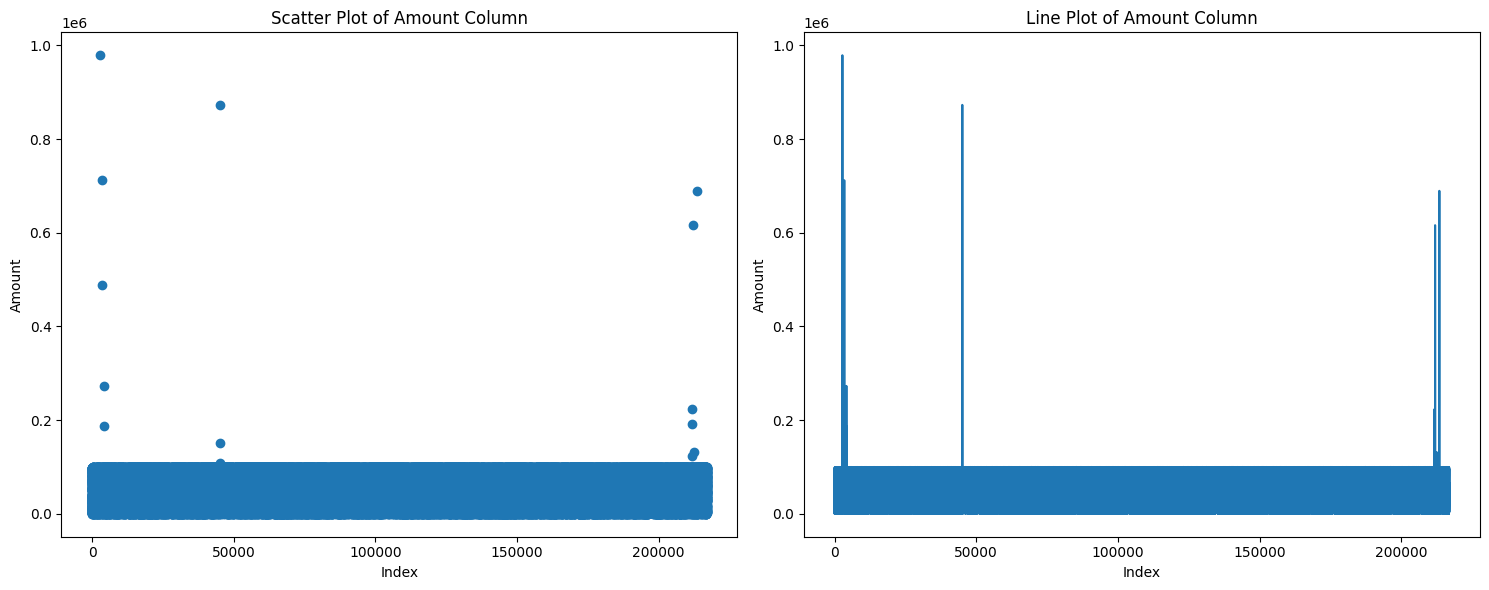

In [442]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

_ = ax1.scatter(range(len(df)), df['Amount'])
_ = ax1.set_xlabel('Index')
_ = ax1.set_ylabel('Amount')
_ = ax1.set_title('Scatter Plot of Amount Column')

_ = ax2.plot(df['Amount'])
_ = ax2.set_xlabel('Index')
_ = ax2.set_ylabel('Amount')
_ = ax2.set_title('Line Plot of Amount Column')

plt.tight_layout()
plt.show()

# `plot_column_vs_amount()`

In [443]:
def plot_column_vs_amount(df, column_name, figsize=(12, 10)):
  # return

  unique_values = np.sort(df[column_name].unique())

  num_unique_values = len(unique_values)
  num_cols = 2
  num_rows = (num_unique_values + num_cols - 1) // num_cols

  fig, axs = plt.subplots(num_rows, num_cols, figsize=figsize)

  if num_rows == 1:
    axs = [axs]

  for i, value in enumerate(unique_values):
    row = i // num_cols
    col = i % num_cols
    ax = axs[row][col]

    _ = df_value = df[df[column_name] == value]
    _ = ax.scatter(range(len(df_value)), df_value['Amount'])
    _ = ax.set_title(f'Scatter Plot of Amount for {value}')
    _ = ax.set_xlabel('Index')
    _ = ax.set_ylabel('Amount')

  plt.tight_layout()
  plt.show()

# Location: `plot_column_vs_amount`

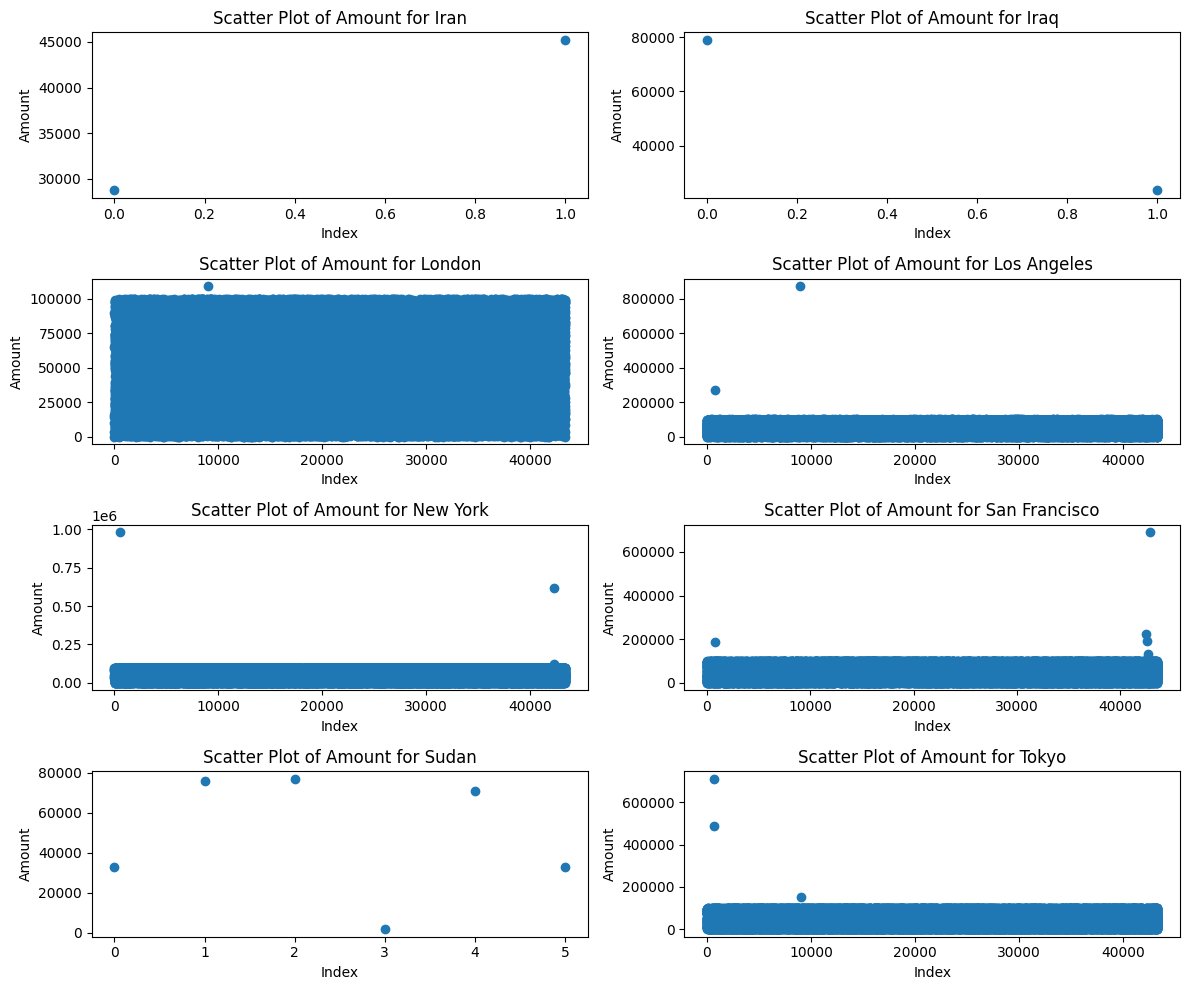

In [444]:
plot_column_vs_amount(df, 'Location')

# TransactionType: `plot_column_vs_amount`

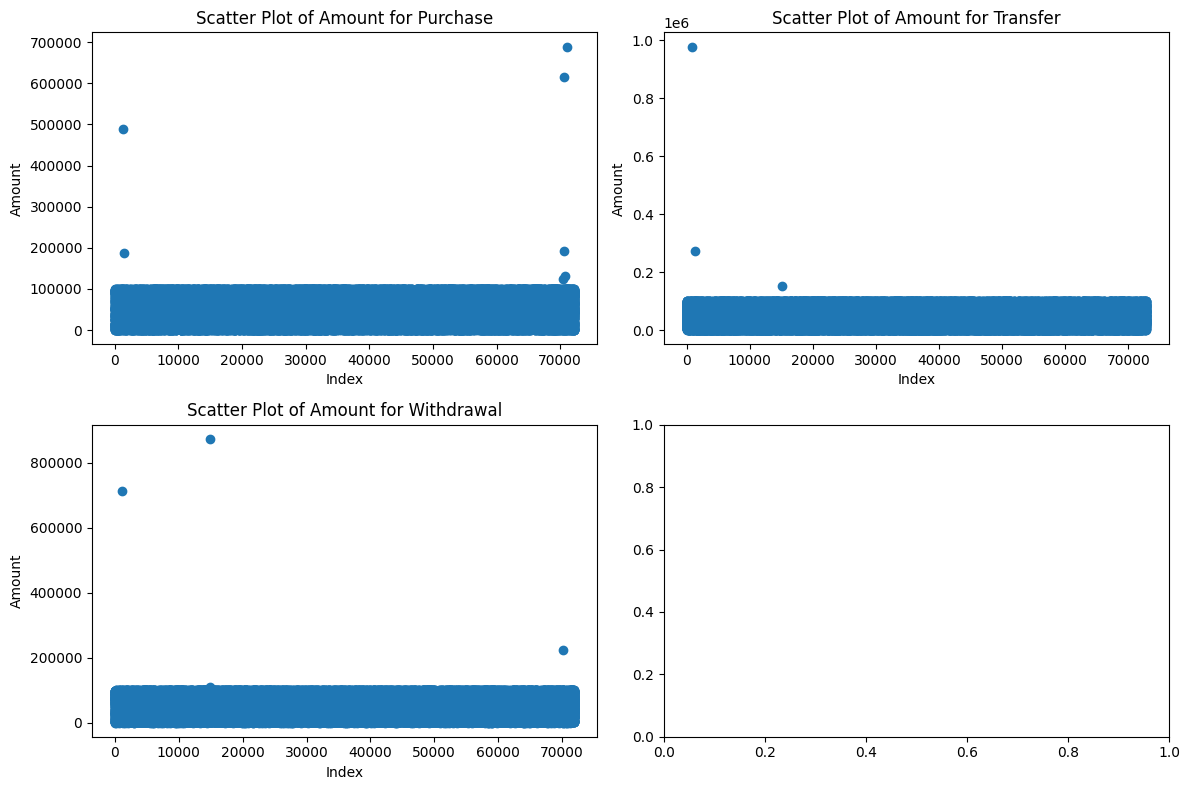

In [445]:
plot_column_vs_amount(df, 'TransactionType', figsize=(12, 8))

# Merchant: `plot_column_vs_amount`

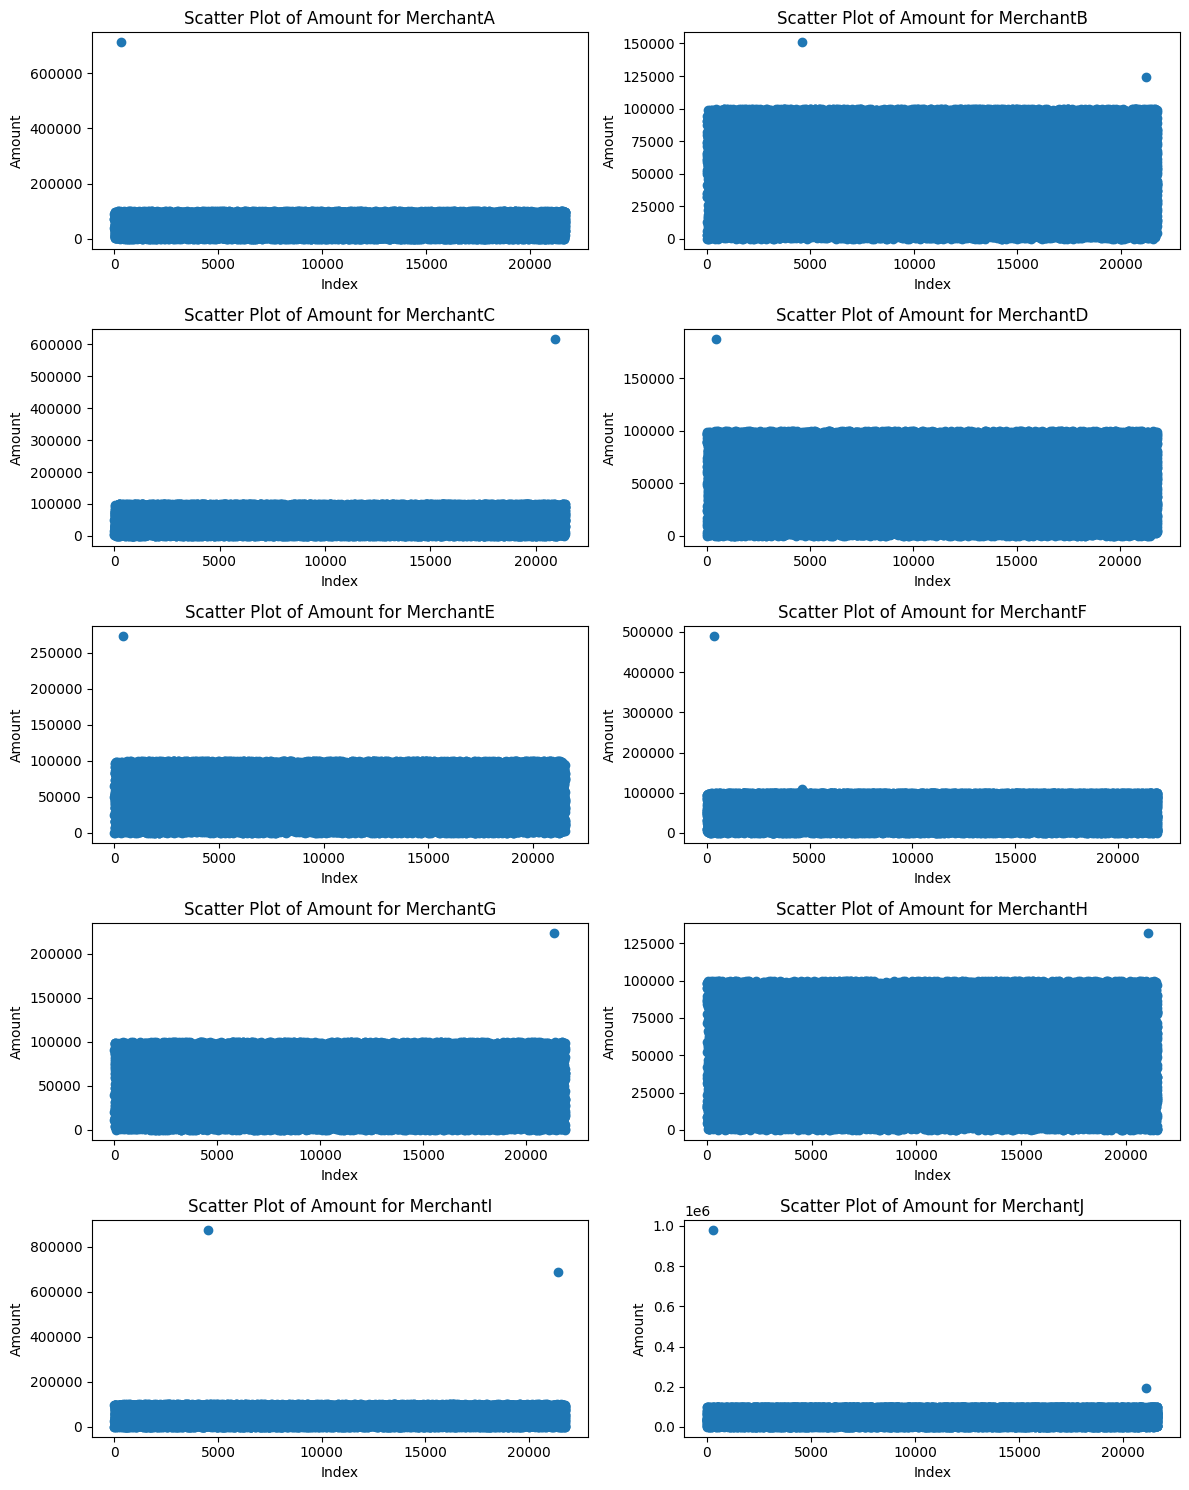

In [446]:
plot_column_vs_amount(df, 'Merchant', figsize=(12, 15))

## MerchantA

In [447]:
df[df['Merchant'] == 'MerchantA']

,Timestamp,TransactionID,AccountID,Amount,Merchant,TransactionType,Location
21,01-01-2023 08:21,TXN613,ACC15,71327.35,MerchantA,Purchase,San Francisco
28,01-01-2023 08:28,TXN1497,ACC7,90683.78,MerchantA,Purchase,Los Angeles
38,01-01-2023 08:38,TXN1634,ACC6,39888.46,MerchantA,Purchase,London
50,01-01-2023 08:50,TXN1705,ACC4,71220.80,MerchantA,Withdrawal,Tokyo
55,01-01-2023 08:55,TXN1540,ACC3,76857.72,MerchantA,Withdrawal,Tokyo
...,...,...,...,...,...,...,...
216931,31-05-2023 23:31,TXN4,ACC1,85618.52,MerchantA,Purchase,New York
216932,31-05-2023 23:32,TXN582,ACC5,97969.69,MerchantA,Purchase,London
216938,31-05-2023 23:38,TXN382,ACC10,96344.97,MerchantA,Withdrawal,New York
216953,31-05-2023 23:53,TXN1147,ACC9,28092.82,MerchantA,Withdrawal,Tokyo


In [448]:
df[df['Merchant'] == 'MerchantA'].describe()

,Amount
count,21699.000000
mean,50057.360128
std,29273.236834
min,13.090000
25%,24945.015000
50%,50027.140000
75%,75186.850000
max,712076.970000


In [449]:
df[(df['Merchant'] == 'MerchantA') & (df['Amount'] > 10**5)]

,Timestamp,TransactionID,AccountID,Amount,Merchant,TransactionType,Location
3448,03-01-2023 17:28,TXN827,ACC12,712076.97,MerchantA,Withdrawal,Tokyo


In [450]:
df[df['Merchant'] == 'MerchantA']['Location'].value_counts()

Location
Los Angeles      4394
Tokyo            4393
San Francisco    4368
London           4331
New York         4212
Iran                1
Name: count, dtype: int64

In [451]:
df[df['Merchant'] == 'MerchantA']['AccountID'].value_counts()

df[(df['Merchant'] == 'MerchantA') & (df['AccountID'] == 'ACC12')]

AccountID
ACC7     1504
ACC4     1504
ACC2     1494
ACC11    1485
ACC10    1478
ACC9     1467
ACC12    1452
ACC15    1446
ACC3     1438
ACC1     1432
ACC6     1428
ACC5     1422
ACC8     1398
ACC14    1382
ACC13    1369
Name: count, dtype: int64

,Timestamp,TransactionID,AccountID,Amount,Merchant,TransactionType,Location
347,01-01-2023 13:47,TXN1939,ACC12,54854.49,MerchantA,Purchase,New York
636,01-01-2023 18:36,TXN1167,ACC12,77695.03,MerchantA,Transfer,San Francisco
645,01-01-2023 18:45,TXN520,ACC12,89768.49,MerchantA,Purchase,Los Angeles
1030,02-01-2023 01:10,TXN1874,ACC12,73089.73,MerchantA,Transfer,London
1466,02-01-2023 08:26,TXN1243,ACC12,36740.38,MerchantA,Purchase,London
...,...,...,...,...,...,...,...
215322,30-05-2023 20:42,TXN1972,ACC12,76954.57,MerchantA,Transfer,Los Angeles
215591,31-05-2023 01:11,TXN107,ACC12,45444.44,MerchantA,Withdrawal,San Francisco
216113,31-05-2023 09:53,TXN1452,ACC12,75723.44,MerchantA,Purchase,Los Angeles
216825,31-05-2023 21:45,TXN778,ACC12,66487.27,MerchantA,Purchase,San Francisco


In [452]:
df[(df['Merchant'] == 'MerchantA') & (
    df['AccountID'] == 'ACC12')]['Location'].value_counts()

Location
San Francisco    309
London           289
Tokyo            288
Los Angeles      284
New York         282
Name: count, dtype: int64

# AccountID: `plot_column_vs_amount`

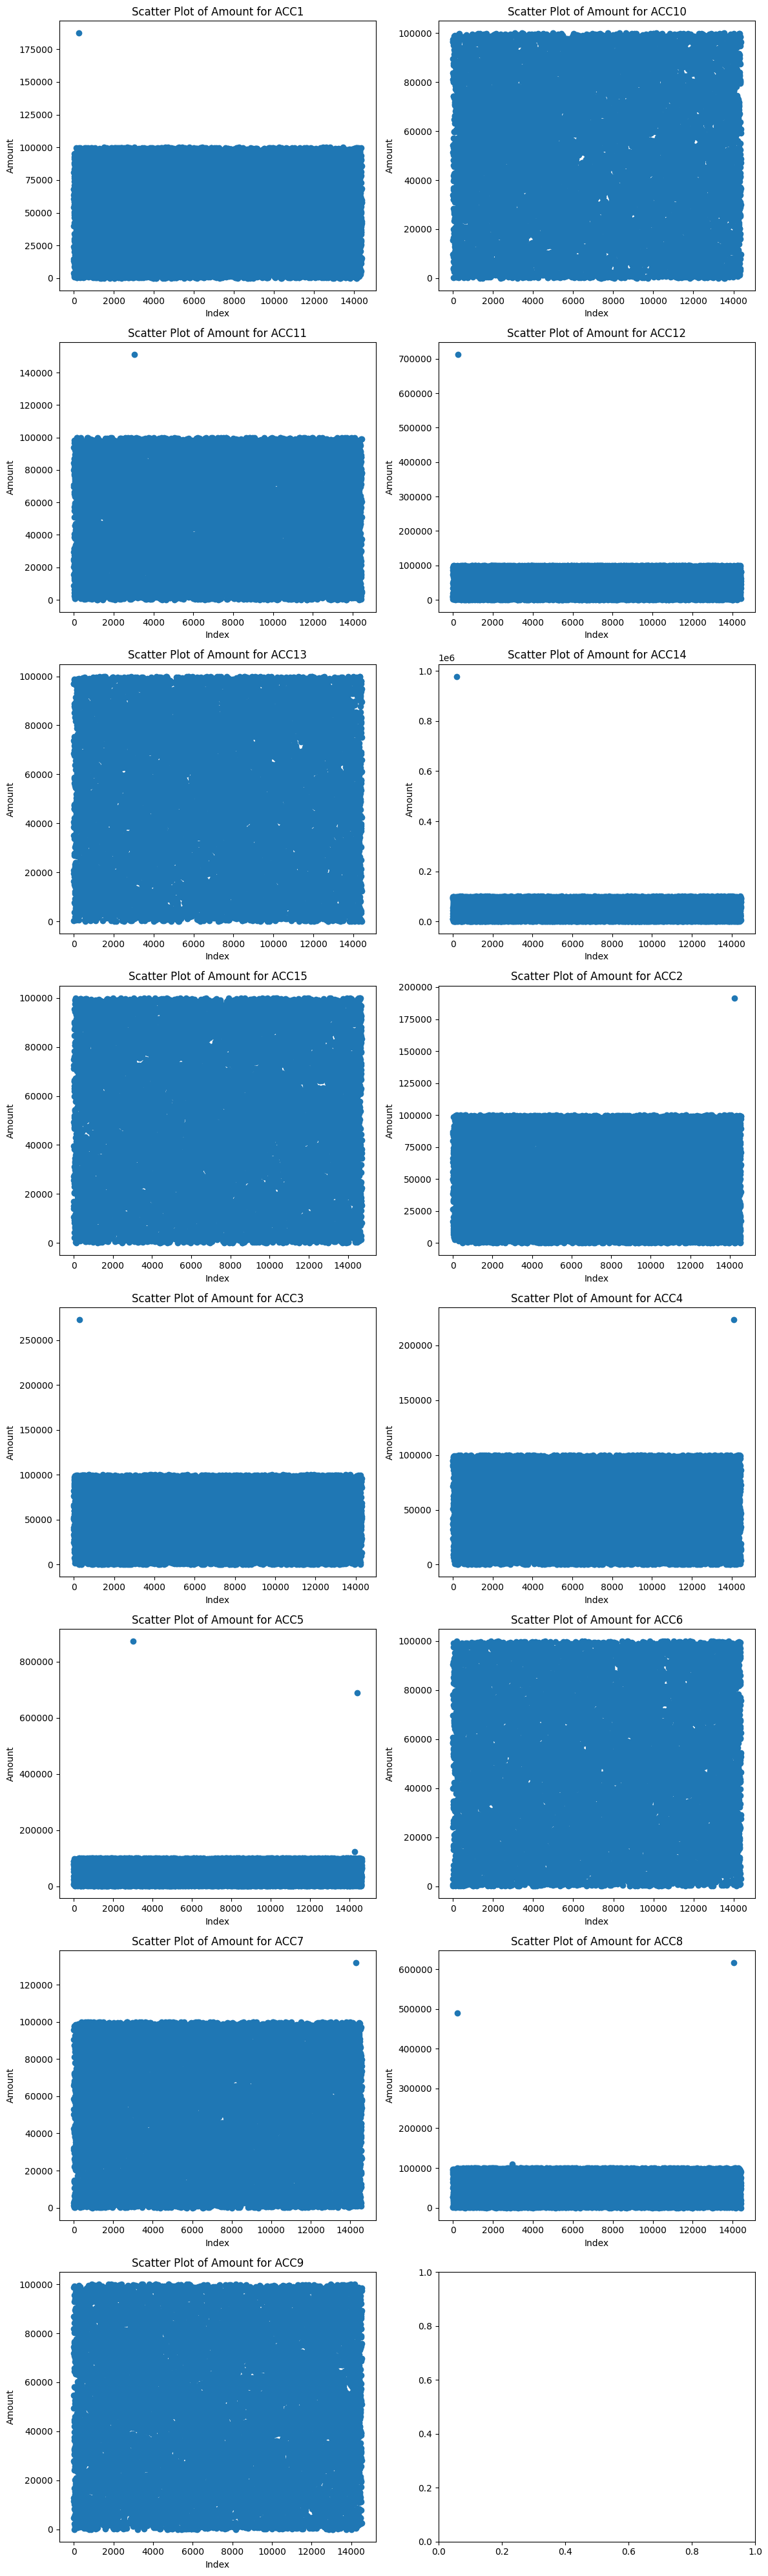

In [453]:
plot_column_vs_amount(df, 'AccountID', figsize=(12, 40))

# Data preprocessing

In [454]:
df = df_cleaned
df

,Timestamp,TransactionID,AccountID,Amount,Merchant,TransactionType,Location
0,01-01-2023 08:00,TXN1127,ACC4,95071.92,MerchantH,Purchase,Tokyo
1,01-01-2023 08:01,TXN1639,ACC10,15607.89,MerchantH,Purchase,London
2,01-01-2023 08:02,TXN872,ACC8,65092.34,MerchantE,Withdrawal,London
3,01-01-2023 08:03,TXN1438,ACC6,87.87,MerchantE,Purchase,London
4,01-01-2023 08:04,TXN1338,ACC6,716.56,MerchantI,Purchase,Los Angeles
...,...,...,...,...,...,...,...
216955,31-05-2023 23:55,TXN1286,ACC6,62536.88,MerchantA,Withdrawal,San Francisco
216956,31-05-2023 23:56,TXN1015,ACC5,68629.69,MerchantG,Transfer,London
216957,31-05-2023 23:57,TXN1979,ACC15,8203.57,MerchantF,Purchase,London
216958,31-05-2023 23:58,TXN1845,ACC14,77800.36,MerchantF,Purchase,New York


# 🗺️ Sanctioned countries experimentation

In [455]:
import random

sanctioned_countries = ['Iran', 'Iraq', 'Sudan']
df = df_cleaned
test_Df = df.copy()
test_Df.loc[:999, 'Location'] = random.choices(sanctioned_countries, k=1000)
test_Df

,Timestamp,TransactionID,AccountID,Amount,Merchant,TransactionType,Location
0,01-01-2023 08:00,TXN1127,ACC4,95071.92,MerchantH,Purchase,Iran
1,01-01-2023 08:01,TXN1639,ACC10,15607.89,MerchantH,Purchase,Iraq
2,01-01-2023 08:02,TXN872,ACC8,65092.34,MerchantE,Withdrawal,Iran
3,01-01-2023 08:03,TXN1438,ACC6,87.87,MerchantE,Purchase,Iraq
4,01-01-2023 08:04,TXN1338,ACC6,716.56,MerchantI,Purchase,Sudan
...,...,...,...,...,...,...,...
216955,31-05-2023 23:55,TXN1286,ACC6,62536.88,MerchantA,Withdrawal,San Francisco
216956,31-05-2023 23:56,TXN1015,ACC5,68629.69,MerchantG,Transfer,London
216957,31-05-2023 23:57,TXN1979,ACC15,8203.57,MerchantF,Purchase,London
216958,31-05-2023 23:58,TXN1845,ACC14,77800.36,MerchantF,Purchase,New York


In [456]:
test_sample = test_Df.loc[0]

if test_sample['Location'] in sanctioned_countries:
  print('Anomaly detected')

Anomaly detected


In [457]:
test_Df[test_Df['Location'].isin(sanctioned_countries)]

,Timestamp,TransactionID,AccountID,Amount,Merchant,TransactionType,Location
0,01-01-2023 08:00,TXN1127,ACC4,95071.92,MerchantH,Purchase,Iran
1,01-01-2023 08:01,TXN1639,ACC10,15607.89,MerchantH,Purchase,Iraq
2,01-01-2023 08:02,TXN872,ACC8,65092.34,MerchantE,Withdrawal,Iran
3,01-01-2023 08:03,TXN1438,ACC6,87.87,MerchantE,Purchase,Iraq
4,01-01-2023 08:04,TXN1338,ACC6,716.56,MerchantI,Purchase,Sudan
...,...,...,...,...,...,...,...
158903,21-04-2023 16:23,TXN1138,ACC10,79045.90,MerchantG,Withdrawal,Iraq
161827,23-04-2023 17:07,TXN144,ACC11,23455.33,MerchantB,Withdrawal,Iraq
170576,29-04-2023 18:56,TXN104,ACC4,1725.10,MerchantE,Withdrawal,Sudan
171600,30-04-2023 12:00,TXN1627,ACC5,70711.69,MerchantJ,Withdrawal,Sudan


# 🚨 Pipeline experimentation [Start]

In [458]:
def date_time_splitter(df: pd.DataFrame):
  df = df.copy()
  df['Timestamp'] = pd.to_datetime(
      df['Timestamp'], format='%d-%m-%Y %H:%M')  # Parse timestamp format

  df.loc[:, 'Day'] = df['Timestamp'].dt.day
  df.loc[:, 'Month'] = df['Timestamp'].dt.month
  df.loc[:, 'Year'] = df['Timestamp'].dt.year
  df.loc[:, 'Hour'] = df['Timestamp'].dt.hour
  df.loc[:, 'Minute'] = df['Timestamp'].dt.minute

  # df = df.drop(columns=['Timestamp'])

  return df

In [459]:
df = df_cleaned
df

,Timestamp,TransactionID,AccountID,Amount,Merchant,TransactionType,Location
0,01-01-2023 08:00,TXN1127,ACC4,95071.92,MerchantH,Purchase,Tokyo
1,01-01-2023 08:01,TXN1639,ACC10,15607.89,MerchantH,Purchase,London
2,01-01-2023 08:02,TXN872,ACC8,65092.34,MerchantE,Withdrawal,London
3,01-01-2023 08:03,TXN1438,ACC6,87.87,MerchantE,Purchase,London
4,01-01-2023 08:04,TXN1338,ACC6,716.56,MerchantI,Purchase,Los Angeles
...,...,...,...,...,...,...,...
216955,31-05-2023 23:55,TXN1286,ACC6,62536.88,MerchantA,Withdrawal,San Francisco
216956,31-05-2023 23:56,TXN1015,ACC5,68629.69,MerchantG,Transfer,London
216957,31-05-2023 23:57,TXN1979,ACC15,8203.57,MerchantF,Purchase,London
216958,31-05-2023 23:58,TXN1845,ACC14,77800.36,MerchantF,Purchase,New York


In [460]:
categorical_cols = df.select_dtypes(include=['object']).columns
categorical_cols

numerical_cols = df.select_dtypes(include=['number']).columns
numerical_cols

Index(['Timestamp', 'TransactionID', 'AccountID', 'Merchant',
       'TransactionType', 'Location'],
      dtype='object')

Index(['Amount'], dtype='object')

In [461]:
categorical_cols = ['TransactionID', 'AccountID',
                    'Merchant', 'TransactionType', 'Location']

numerical_cols = ['Amount']

time_cols = [
    'Timestamp',
    'Day',
    'Month',
    'Year',
    'Hour',
    'Minute',
]

In [462]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, FunctionTransformer
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [463]:
def label_encoding(df):
  le = LabelEncoder()
  for col in df.columns:
    df[col] = le.fit_transform(df[col])
  return df

In [464]:
column_transformer = ColumnTransformer(
    transformers=[
        ('label_encoding', FunctionTransformer(
            label_encoding), categorical_cols),
        ('min_max_scaling', MinMaxScaler(), numerical_cols),
        ('date_time_splitter', FunctionTransformer(
            date_time_splitter), ['Timestamp']),
    ], remainder='passthrough'
)

pipeline = Pipeline([
    ('column_transformer', column_transformer)
])

transformed_data = pipeline.fit_transform(df)
transformed_data[0]

transformed_df = pd.DataFrame(
    transformed_data, columns=categorical_cols + numerical_cols + time_cols)
transformed_df

array([143, 9, 7, 0, 7, 0.09710729067680152,
       Timestamp('2023-01-01 08:00:00'), 1, 1, 2023, 8, 0], dtype=object)

,TransactionID,AccountID,Merchant,TransactionType,Location,Amount,Timestamp,Day,Month,Year,Hour,Minute
0,143,9,7,0,7,0.097107,2023-01-01 08:00:00,1,1,2023,8,0
1,711,1,7,0,2,0.015933,2023-01-01 08:01:00,1,1,2023,8,1
2,1858,13,4,2,2,0.066482,2023-01-01 08:02:00,1,1,2023,8,2
3,488,11,4,0,2,0.000079,2023-01-01 08:03:00,1,1,2023,8,3
4,377,11,8,0,3,0.000721,2023-01-01 08:04:00,1,1,2023,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...
216955,319,11,0,2,5,0.063872,2023-05-31 23:55:00,31,5,2023,23,55
216956,19,10,6,1,2,0.070096,2023-05-31 23:56:00,31,5,2023,23,56
216957,1088,6,5,0,2,0.008369,2023-05-31 23:57:00,31,5,2023,23,57
216958,940,5,5,0,4,0.079464,2023-05-31 23:58:00,31,5,2023,23,58


# 🚨 Pipeline experimentation [End]

# Timestamp

In [465]:
def process_timestamp(df: pd.DataFrame):
  df = df.copy()
  df.loc[:, 'Timestamp'] = pd.to_datetime(
      df['Timestamp'], format=r'%d-%m-%Y %H:%M').astype('int64') // 10**9
  return df

In [466]:
# df_timestamp = date_time_splitter(df)
df_timestamp = process_timestamp(df)


df_timestamp

,Timestamp,TransactionID,AccountID,Amount,Merchant,TransactionType,Location
0,1672560000,TXN1127,ACC4,95071.92,MerchantH,Purchase,Tokyo
1,1672560060,TXN1639,ACC10,15607.89,MerchantH,Purchase,London
2,1672560120,TXN872,ACC8,65092.34,MerchantE,Withdrawal,London
3,1672560180,TXN1438,ACC6,87.87,MerchantE,Purchase,London
4,1672560240,TXN1338,ACC6,716.56,MerchantI,Purchase,Los Angeles
...,...,...,...,...,...,...,...
216955,1685577300,TXN1286,ACC6,62536.88,MerchantA,Withdrawal,San Francisco
216956,1685577360,TXN1015,ACC5,68629.69,MerchantG,Transfer,London
216957,1685577420,TXN1979,ACC15,8203.57,MerchantF,Purchase,London
216958,1685577480,TXN1845,ACC14,77800.36,MerchantF,Purchase,New York


In [467]:
df = df_timestamp.copy()

# LabelEncoder

In [468]:
from sklearn.preprocessing import LabelEncoder

In [469]:
df.dtypes

Timestamp           object
TransactionID       object
AccountID           object
Amount             float64
Merchant            object
TransactionType     object
Location            object
dtype: object

In [470]:
categorical_cols = df.select_dtypes(include=['object']).columns
categorical_cols

numerical_cols = df.select_dtypes(include=['number']).columns
numerical_cols

Index(['Timestamp', 'TransactionID', 'AccountID', 'Merchant',
       'TransactionType', 'Location'],
      dtype='object')

Index(['Amount'], dtype='object')

In [471]:
def label_encode_dataframe(df, categorical_cols):
  df = df.copy()
  label_encoder = LabelEncoder()

  for column in categorical_cols:
    df.loc[:, column] = label_encoder.fit_transform(df[column])

  return df

In [472]:
df = label_encode_dataframe(df, categorical_cols)
df

,Timestamp,TransactionID,AccountID,Amount,Merchant,TransactionType,Location
0,0,143,9,95071.92,7,0,7
1,1,711,1,15607.89,7,0,2
2,2,1858,13,65092.34,4,2,2
3,3,488,11,87.87,4,0,2
4,4,377,11,716.56,8,0,3
...,...,...,...,...,...,...,...
216955,216955,319,11,62536.88,0,2,5
216956,216956,19,10,68629.69,6,1,2
216957,216957,1088,6,8203.57,5,0,2
216958,216958,940,5,77800.36,5,0,4


In [473]:
df_timestamp['Merchant'].value_counts().sort_index()
df['Merchant'].value_counts().sort_index()

Merchant
MerchantA    21699
MerchantB    21766
MerchantC    21393
MerchantD    21820
MerchantE    21543
MerchantF    21924
MerchantG    21891
MerchantH    21518
MerchantI    21752
MerchantJ    21654
Name: count, dtype: int64

Merchant
0    21699
1    21766
2    21393
3    21820
4    21543
5    21924
6    21891
7    21518
8    21752
9    21654
Name: count, dtype: int64

# Feature engineering

In [474]:
df = df.drop(columns=['Timestamp', 'TransactionID'])

In [475]:
df

,AccountID,Amount,Merchant,TransactionType,Location
0,9,95071.92,7,0,7
1,1,15607.89,7,0,2
2,13,65092.34,4,2,2
3,11,87.87,4,0,2
4,11,716.56,8,0,3
...,...,...,...,...,...
216955,11,62536.88,0,2,5
216956,10,68629.69,6,1,2
216957,6,8203.57,5,0,2
216958,5,77800.36,5,0,4


# MinMaxScaler

In [476]:
from sklearn.preprocessing import MinMaxScaler

In [477]:
scaler = MinMaxScaler()
df.loc[:, 'Amount'] = scaler.fit_transform(df[['Amount']])

In [478]:
df

,AccountID,Amount,Merchant,TransactionType,Location
0,9,0.097107,7,0,7
1,1,0.015933,7,0,2
2,13,0.066482,4,2,2
3,11,0.000079,4,0,2
4,11,0.000721,8,0,3
...,...,...,...,...,...
216955,11,0.063872,0,2,5
216956,10,0.070096,6,1,2
216957,6,0.008369,5,0,2
216958,5,0.079464,5,0,4


# Model selection

In [479]:
df = transformed_df
df

,TransactionID,AccountID,Merchant,TransactionType,Location,Amount,Timestamp,Day,Month,Year,Hour,Minute
0,143,9,7,0,7,0.097107,2023-01-01 08:00:00,1,1,2023,8,0
1,711,1,7,0,2,0.015933,2023-01-01 08:01:00,1,1,2023,8,1
2,1858,13,4,2,2,0.066482,2023-01-01 08:02:00,1,1,2023,8,2
3,488,11,4,0,2,0.000079,2023-01-01 08:03:00,1,1,2023,8,3
4,377,11,8,0,3,0.000721,2023-01-01 08:04:00,1,1,2023,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...
216955,319,11,0,2,5,0.063872,2023-05-31 23:55:00,31,5,2023,23,55
216956,19,10,6,1,2,0.070096,2023-05-31 23:56:00,31,5,2023,23,56
216957,1088,6,5,0,2,0.008369,2023-05-31 23:57:00,31,5,2023,23,57
216958,940,5,5,0,4,0.079464,2023-05-31 23:58:00,31,5,2023,23,58


In [480]:
X = transformed_df[['Amount']]

In [481]:
from sklearn.ensemble import IsolationForest

https://cs.nju.edu.cn/zhouzh/zhouzh.files/publication/icdm08b.pdf

In [482]:
random_state = np.random.RandomState(42)
clf = IsolationForest(n_estimators=100, max_samples='auto',
                      contamination=float(0.001), random_state=random_state)

In [483]:
clf.fit(X)

IsolationForest(contamination=0.001,
                random_state=RandomState(MT19937) at 0x28AD6679040)

In [484]:
predictions = clf.predict(X)
predictions

array([1, 1, 1, ..., 1, 1, 1])

In [485]:
abnormal_indexes = np.where(predictions < 0)

abnormal_indexes


abnormal_indexes[0].shape

(array([  2775,   3448,   3453,   4148,   4194,  45099,  45100,  45108,
        211714, 211753, 211866, 211959, 212513, 213460], dtype=int64),)

(14,)

In [486]:
range(len(df))
df.loc[:, 'Amount']
df.columns

range(0, 216960)

0         0.097107
1         0.015933
2         0.066482
3         0.000079
4         0.000721
            ...   
216955    0.063872
216956    0.070096
216957    0.008369
216958    0.079464
216959    0.066393
Name: Amount, Length: 216960, dtype: object

Index(['TransactionID', 'AccountID', 'Merchant', 'TransactionType', 'Location',
       'Amount', 'Timestamp', 'Day', 'Month', 'Year', 'Hour', 'Minute'],
      dtype='object')

In [487]:
X = df.values
X
X.shape

array([[143, 9, 7, ..., 2023, 8, 0],
       [711, 1, 7, ..., 2023, 8, 1],
       [1858, 13, 4, ..., 2023, 8, 2],
       ...,
       [1088, 6, 5, ..., 2023, 23, 57],
       [940, 5, 5, ..., 2023, 23, 58],
       [898, 8, 6, ..., 2023, 23, 59]], dtype=object)

(216960, 12)

In [488]:
abnormal_indexes[0].shape
range(abnormal_indexes[0].shape[0])

X[abnormal_indexes, 5]
X[abnormal_indexes, 5].shape

(14,)

range(0, 14)

array([[1.0, 0.7273913222244555, 0.5000162575174419, 0.19136559826566052,
        0.2788545779621511, 0.15426002885287968, 0.8917825783053825,
        0.11148837495565958, 0.12676324983840806, 0.2283429156322696,
        0.195673947647525, 0.629405665921041, 0.1346479670314095,
        0.70433346349222]], dtype=object)

(1, 14)

In [489]:
restricted_countries = ['Iran', 'Iraq', 'Sudan']

In [490]:
restricted_df = df_cleaned[df_cleaned['Location'].isin(restricted_countries)]
restricted_df
restricted_df.index

,Timestamp,TransactionID,AccountID,Amount,Merchant,TransactionType,Location
50577,05-02-2023 10:57,TXN1197,ACC7,32842.18,MerchantC,Transfer,Sudan
99209,11-03-2023 05:29,TXN653,ACC8,76057.53,MerchantC,Purchase,Sudan
126579,30-03-2023 05:39,TXN205,ACC11,28723.44,MerchantA,Purchase,Iran
128725,31-03-2023 17:25,TXN1226,ACC6,45225.65,MerchantH,Withdrawal,Iran
140502,08-04-2023 21:42,TXN745,ACC9,77058.93,MerchantE,Withdrawal,Sudan
158903,21-04-2023 16:23,TXN1138,ACC10,79045.90,MerchantG,Withdrawal,Iraq
161827,23-04-2023 17:07,TXN144,ACC11,23455.33,MerchantB,Withdrawal,Iraq
170576,29-04-2023 18:56,TXN104,ACC4,1725.10,MerchantE,Withdrawal,Sudan
171600,30-04-2023 12:00,TXN1627,ACC5,70711.69,MerchantJ,Withdrawal,Sudan
211779,28-05-2023 09:39,TXN1665,ACC8,32861.35,MerchantF,Withdrawal,Sudan


Index([50577, 99209, 126579, 128725, 140502, 158903, 161827, 170576, 171600,
       211779],
      dtype='int64')

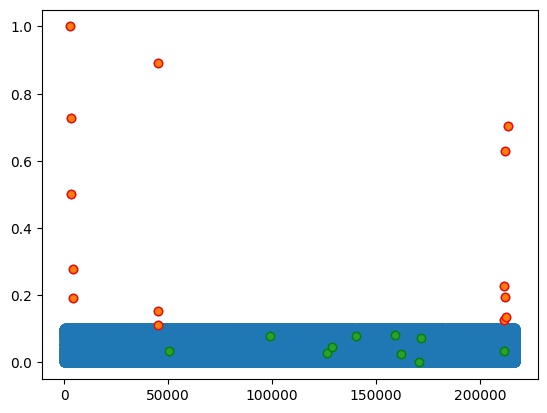

In [491]:
_ = plt.scatter(range(len(df)), df.loc[:, 'Amount'])
_ = plt.scatter(abnormal_indexes, X[abnormal_indexes, 5], edgecolors="r")
_ = plt.scatter(restricted_df.index, X[restricted_df.index, 5], edgecolors="g")

In [492]:
df.loc[abnormal_indexes]

,TransactionID,AccountID,Merchant,TransactionType,Location,Amount,Timestamp,Day,Month,Year,Hour,Minute
2775,56,5,9,1,4,1.0,2023-01-03 06:15:00,3,1,2023,6,15
3448,1808,3,0,2,7,0.727391,2023-01-03 17:28:00,3,1,2023,17,28
3453,768,13,5,0,7,0.500016,2023-01-03 17:33:00,3,1,2023,17,33
4148,1584,0,3,0,5,0.191366,2023-01-04 05:08:00,4,1,2023,5,8
4194,1630,8,4,1,3,0.278855,2023-01-04 05:54:00,4,1,2023,5,54
45099,400,2,1,1,7,0.15426,2023-02-01 15:39:00,1,2,2023,15,39
45100,1001,10,8,2,3,0.891783,2023-02-01 15:40:00,1,2,2023,15,40
45108,735,13,5,2,2,0.111488,2023-02-01 15:48:00,1,2,2023,15,48
211714,1024,10,1,0,4,0.126763,2023-05-28 08:34:00,28,5,2023,8,34
211753,457,9,6,2,5,0.228343,2023-05-28 09:13:00,28,5,2023,9,13


# 🗺️ Extending data csv

In [493]:
df = df_cleaned.copy()

In [494]:
abnormal_indexes

(array([  2775,   3448,   3453,   4148,   4194,  45099,  45100,  45108,
        211714, 211753, 211866, 211959, 212513, 213460], dtype=int64),)

In [495]:
mask = df.index.isin(abnormal_indexes[0])
mask.sum()

14

In [496]:
normal_indices = df[~mask].index
normal_indices

Index([     0,      1,      2,      3,      4,      5,      6,      7,      8,
            9,
       ...
       216950, 216951, 216952, 216953, 216954, 216955, 216956, 216957, 216958,
       216959],
      dtype='int64', length=216946)

In [497]:
random_indices = np.random.choice(normal_indices, 10)
random_indices

array([199994, 157467, 154153, 139316, 117702, 151465,  39036, 105117,
       161398, 189246], dtype=int64)

In [498]:
df.loc[random_indices]

,Timestamp,TransactionID,AccountID,Amount,Merchant,TransactionType,Location
199994,20-05-2023 05:14,TXN888,ACC15,3329.56,MerchantE,Purchase,London
157467,20-04-2023 16:27,TXN503,ACC3,88832.57,MerchantH,Transfer,New York
154153,18-04-2023 09:13,TXN1301,ACC13,67832.44,MerchantG,Transfer,New York
139316,08-04-2023 01:56,TXN296,ACC5,3229.32,MerchantC,Withdrawal,Tokyo
117702,24-03-2023 01:42,TXN810,ACC8,43094.75,MerchantF,Withdrawal,New York
151465,16-04-2023 12:25,TXN740,ACC4,79113.39,MerchantA,Withdrawal,New York
39036,28-01-2023 10:36,TXN1517,ACC9,61666.03,MerchantG,Withdrawal,Tokyo
105117,15-03-2023 07:57,TXN1451,ACC10,95948.51,MerchantA,Withdrawal,New York
161398,23-04-2023 09:58,TXN1339,ACC10,54322.63,MerchantH,Purchase,Tokyo
189246,12-05-2023 18:06,TXN1618,ACC8,81188.18,MerchantI,Transfer,Los Angeles


In [499]:
df.loc[random_indices, ['Location']] = np.random.choice(
    restricted_countries, size=len(random_indices))

df.loc[random_indices]

,Timestamp,TransactionID,AccountID,Amount,Merchant,TransactionType,Location
199994,20-05-2023 05:14,TXN888,ACC15,3329.56,MerchantE,Purchase,Sudan
157467,20-04-2023 16:27,TXN503,ACC3,88832.57,MerchantH,Transfer,Sudan
154153,18-04-2023 09:13,TXN1301,ACC13,67832.44,MerchantG,Transfer,Iran
139316,08-04-2023 01:56,TXN296,ACC5,3229.32,MerchantC,Withdrawal,Iran
117702,24-03-2023 01:42,TXN810,ACC8,43094.75,MerchantF,Withdrawal,Sudan
151465,16-04-2023 12:25,TXN740,ACC4,79113.39,MerchantA,Withdrawal,Iraq
39036,28-01-2023 10:36,TXN1517,ACC9,61666.03,MerchantG,Withdrawal,Sudan
105117,15-03-2023 07:57,TXN1451,ACC10,95948.51,MerchantA,Withdrawal,Iraq
161398,23-04-2023 09:58,TXN1339,ACC10,54322.63,MerchantH,Purchase,Iran
189246,12-05-2023 18:06,TXN1618,ACC8,81188.18,MerchantI,Transfer,Iraq


In [500]:
df

,Timestamp,TransactionID,AccountID,Amount,Merchant,TransactionType,Location
0,01-01-2023 08:00,TXN1127,ACC4,95071.92,MerchantH,Purchase,Tokyo
1,01-01-2023 08:01,TXN1639,ACC10,15607.89,MerchantH,Purchase,London
2,01-01-2023 08:02,TXN872,ACC8,65092.34,MerchantE,Withdrawal,London
3,01-01-2023 08:03,TXN1438,ACC6,87.87,MerchantE,Purchase,London
4,01-01-2023 08:04,TXN1338,ACC6,716.56,MerchantI,Purchase,Los Angeles
...,...,...,...,...,...,...,...
216955,31-05-2023 23:55,TXN1286,ACC6,62536.88,MerchantA,Withdrawal,San Francisco
216956,31-05-2023 23:56,TXN1015,ACC5,68629.69,MerchantG,Transfer,London
216957,31-05-2023 23:57,TXN1979,ACC15,8203.57,MerchantF,Purchase,London
216958,31-05-2023 23:58,TXN1845,ACC14,77800.36,MerchantF,Purchase,New York


In [501]:
# df.to_csv('./Data/df_restricted_countries.csv')